# Segmentation of June 15th Flight Data
Purpose:  Get segmentation of data, based on demanded airspeeds using actual time.

Looking out for RPM's of zero, or unsettled conditions for each airspeed.  

## Segmentation of data by Actual Time 

Purpose:  To segment the flight data by the real time, not the index number, since index number can change as sampling rate is changed

Method:  
1. Plot 1 Hz sampled data, already have mask for 1 Hz rate.
2. Get best guess of actual sampled time
3. Update mask with actual sample times
4. Try new mask on increased sampling rates

### Current 1 Hz Mask (Cruising)

    mask = np.array([[9000, 9574],
                    [9600, 10200],
                    [10200,10900],
                    [10900,11500],
                    [11500,11900],
                    [12800,13049],
                    [13057,13350],
                    [13400,13950],
                    [14050,14450]])


| Segment | Start | Finish |
|---------|-------|--------|
|     1    |    08:54:36    |    09:04:09     |
|     2    |    09:04:36    |    09:16:09     |
|     3    |    09:16:11    |    09:26:10     |
|     4    |    09:26:10    |    09:36:09     |
|     5*    |    09:36:15    |    09:44:58     |
|     6*    |    09:46:53    |    09:57:05     |
|     7    |    09:57:40    |    10:07:21     |
|     8    |    10:07:29    |    10:17:21     |
|     9    |    10:18:25    |    10:24:34     |
|     10   |    10:24:37    |    10:27:55     |
\* includes bad data

### Current 1 Hz Mask (Descending)

    desc_mask = np.array([[3449 , 3497],
                    [3687 , 3744],
                    [3931 , 3991],
                    [4166 , 4231],
                    [4419 , 4487],
                    [4653 , 4737],
                    [4915 , 4988],
                    [5159 , 5236],
                    [5395 , 5476],
                    [5648 , 5741],
                    [5922 , 6007],
                    [6194 , 6279],
                    [6462 , 6550],
                    [6743 , 6841],
                    [7039 , 7149],
                    [7347 , 7458],
                    [7672 , 7770],
                    [7980 , 8078],
                    [8302 , 8423],
                    [8586 , 8690]])

| Segment | Start | Finish |
|---------|-------|--------|
|     1    |    08:54:36    |    09:04:09     |
|     2    |    09:04:36    |    09:16:09     |
|     3    |    09:16:11    |    09:26:10     |
|     4    |    09:26:10    |    09:36:09     |
|     5*    |    09:36:15    |    09:44:58     |
|     6*    |    09:46:53    |    09:57:05     |
|     7    |    09:57:40    |    10:07:21     |
|     8    |    10:07:29    |    10:17:21     |
|     9    |    10:18:25    |    10:24:34     |
|     10   |    10:24:37    |    10:27:55     |

In [57]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.io

import main
from main import flight
from main import analysis
import propellers
import motors
from aircraft import airplane
import cl_finders

In [58]:
## Unpickling 
df_100Hz = pd.read_pickle("./data/june15_2022_100Hz.pkl")
df_60Hz = pd.read_pickle("./data/june15_2022_60Hz.pkl")
df_1Hz = pd.read_pickle("./data/june15_2022_1Hz.pkl")

df = df_100Hz.interpolate(method="linear")

In [ ]:
# Vehicle parameters
prop = propellers.aeronaut185x12() # Using aeronaut 20x8 for this flight
motor = motors.U7V2_280KV()  # Using U7 V2 motor

mass = 12.727 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

P_systems = 4 # Amount of power consumed by everything except the ESC & motor

In [61]:
### Mask Initialization ###

mask = np.array([[9000, 9574],
                [9600, 10200],
                [10200,10900],
                [10900,11500],
                [11500,11900],
                [12800,13049],
                [13057,13350],
                [13400,13950],
                [14050,14450]])

desc_mask = np.array([[3449 , 3497],
                    [3687 , 3744],
                    [3931 , 3991],
                    [4166 , 4231],
                    [4419 , 4487],
                    [4653 , 4737],
                    [4915 , 4988],
                    [5159 , 5236],
                    [5395 , 5476],
                    [5648 , 5741],
                    [5922 , 6007],
                    [6194 , 6279],
                    [6462 , 6550],
                    [6743 , 6841],
                    [7039 , 7149],
                    [7347 , 7458],
                    [7672 , 7770],
                    [7980 , 8078],
                    [8302 , 8423],
                    [8586 , 8690]])

for i in range(np.shape(desc_mask)[0]):
    print(df_1Hz.index[desc_mask[i,0]], df_1Hz.index[desc_mask[i,1]])

2022-06-15 07:22:05 2022-06-15 07:22:53
2022-06-15 07:26:03 2022-06-15 07:27:00
2022-06-15 07:30:07 2022-06-15 07:31:07
2022-06-15 07:34:02 2022-06-15 07:35:07
2022-06-15 07:38:15 2022-06-15 07:39:23
2022-06-15 07:42:09 2022-06-15 07:43:33
2022-06-15 07:46:31 2022-06-15 07:47:44
2022-06-15 07:50:35 2022-06-15 07:51:52
2022-06-15 07:54:31 2022-06-15 07:55:52
2022-06-15 07:58:44 2022-06-15 08:00:17
2022-06-15 08:03:18 2022-06-15 08:04:43
2022-06-15 08:07:50 2022-06-15 08:09:15
2022-06-15 08:12:18 2022-06-15 08:13:46
2022-06-15 08:16:59 2022-06-15 08:18:37
2022-06-15 08:21:55 2022-06-15 08:23:45
2022-06-15 08:27:03 2022-06-15 08:28:54
2022-06-15 08:32:28 2022-06-15 08:34:06
2022-06-15 08:37:36 2022-06-15 08:39:14
2022-06-15 08:42:58 2022-06-15 08:44:59
2022-06-15 08:47:42 2022-06-15 08:49:26


/var/folders/x_/hvhbycx15x31bybxtb1h9ktc0000gn/T/ipykernel_85373/2848444870.py:26: RuntimeWarning: divide by zero encountered in true_divide
  J = v_tas / (n * prop.diameter)
/var/folders/x_/hvhbycx15x31bybxtb1h9ktc0000gn/T/ipykernel_85373/2848444870.py:26: RuntimeWarning: invalid value encountered in true_divide
  J = v_tas / (n * prop.diameter)
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/propellers.py:83: RuntimeWarning: invalid value encountered in add
  CT = -1.636*J**5 + 3.933*J**4 - 3.246*J**3 + 0.8995*J**2 - 0.09467*J**1 + 0.08651 # (11-18 Fit, Freewheel data)
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/propellers.py:91: RuntimeWarning: invalid value encountered in subtract
  CP = 0.2741*J**4 - 0.5853*J**3 + 0.3012*J**2 - 0.05987*J**1 + 0.04802 # (11-18 Fit, Freewheel data)
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/motors.py:53: RuntimeWarning: divide by zero encountered in true_divide
  efficiency = (1 - (i0/current)) * (K

Freewheel thrust coefficient:  -0.00804445463199624 
 Advance Ratio:  0.8386905840958647 
 CP Freewheel:  5.129680916149404e-10


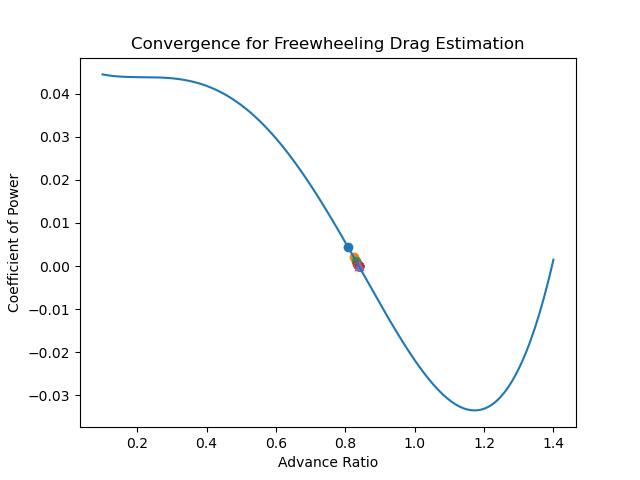

Propeller Drag[nan nan nan ...  0.  0.  0.]


/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/cl_finders.py:86: RuntimeWarning: divide by zero encountered in reciprocal
  CD = p_required * (q * v * aircraft.area)**-1
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/cl_finders.py:86: RuntimeWarning: invalid value encountered in multiply
  CD = p_required * (q * v * aircraft.area)**-1
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/cl_finders.py:18: RuntimeWarning: divide by zero encountered in reciprocal
  CL = aircraft.weight * (np.cos(phi) * q * aircraft.area)**-1


In [50]:
############# Main Analysis ###############3

# Attitude 
phi = np.deg2rad(df["RollAngle"].to_numpy())            # Bank angle in radians
pitch = np.deg2rad(df["PitchAngle"].to_numpy())         # Pitch angle in radians

# Atmospheric adjustments:
rho = df["Pressure"].to_numpy() * (287 * (df["Ambient_Temperature"].to_numpy()+273.15))**-1             # Density found from barometer pressure & airspeed sensor temperatures
v_eas = df["Airspeed_Sensor0"].to_numpy()                               # Equivalent SSL airspeed (m/s)
v_tas = v_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed
q = 0.5 * rho * v_tas**2                            # Dynamic pressure 

# For Descent method
h = df["Altitude_POS"].to_numpy()                   # Altitude
Vd_eas = df["DescendingXK"].to_numpy()                  # Descent Rate from EKF (is it true or EAS at SSL?)
Vd_tas = Vd_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed

# Ground speed limiter

v_dem = df["Airspeed_Demanded"].to_numpy()

# Propulsion characterization
n = df["MotorRPM"].to_numpy() / 60                               # Revolutions per second
i_esc = df["EscCurrent"].to_numpy()
v_esc = df["EscVoltage"].to_numpy()
J = v_tas / (n * prop.diameter)
eff = prop.efficiency(J) * motor.efficiency(n, i_esc)

# Estimated propulsive power (New Fitting)
P_eta = cl_finders.eta_steady(prop, motor, v_tas, n, i_esc, v_esc)
P_ct = cl_finders.thrust_steady(prop, rho, v_tas, n)
P_desc = cl_finders.desc2preq(createv, prop, rho, v_tas, n, q, Vd_tas)

# Getting drag coefficient
Cd_eta = cl_finders.preq2cd(createv, v_tas, q, P_eta)
Cd_ct = cl_finders.preq2cd(createv, v_tas, q, P_ct)
Cd_desc = cl_finders.preq2cd(createv, v_tas, q, P_desc)

# Getting lift coefficient
CL = cl_finders.cl_banked(createv, q, phi)

## Segmentation of data by Actual Time.

Purpose:  To segment the flight data by the real time, not the index number, since index number can change as sampling rate is changed

Method:  
1. Plot 1 Hz sampled data, already have mask for 1 Hz rate.
2. Get best guess of actual sampled time
3. Update mask with actual sample times
4. Try new mask on increased sampling rates

### Current 1 Hz Mask:

    mask = np.array([[9000, 9574],
                    [9600, 10200],
                    [10200,10900],
                    [10900,11500],
                    [11500,11900],
                    [12800,13049],
                    [13057,13350],
                    [13400,13950],
                    [14050,14450]])


| Segment | Start | Finish |
|---------|-------|--------|
|     1    |    08:54:36    |    09:04:09     |
|     2    |    09:04:36    |    09:16:09     |
|     3    |    09:16:11    |    09:26:10     |
|     4    |    09:26:10    |    09:36:09     |
|     5*    |    09:36:15    |    09:44:58     |
|     6*    |    09:46:53    |    09:57:05     |
|     7    |    09:57:40    |    10:07:21     |
|     8    |    10:07:29    |    10:17:21     |
|     9    |    10:18:25    |    10:24:34     |
|     10   |    10:24:37    |    10:27:55     |
\* includes bad data

In [ ]:
# Plotting time indexed flight data, getting segments #

# Plotting true airspeed, with demanded airspeed
plt.figure(figsize=(10,5))
ax1 = plt.subplot(2,1,1)
ax1.plot(df_100Hz.index, v_tas, label="Airspeed", marker='o', markeredgecolor=[0,0,0], markersize=3, markeredgewidth=0.1)
ax1.plot(df_100Hz.index, v_dem, label="Demanded Airspeed", marker='^', markeredgecolor=[0,0,0], markersize=3, markeredgewidth=0.1)
for i in range(len(mask)):
    segment = np.arange(mask[i,0],mask[i,1])
    ax1.plot(df_1Hz.index[segment], np.ones(len(segment)), marker='v')
ax1.set_ylabel("Airspeeds (m/s)")
ax1.grid(True)
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
plt.legend()

ax2 = plt.subplot(2,1,2, sharex=ax1)
ax2.plot(df.index, n, label='ESC Measurement')
ax2.set_ylabel("Motor Rotation Rate (rev/s)")
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle=':', color='grey')
ax2.grid(True)
plt.legend()

plt.show()


09:04:09


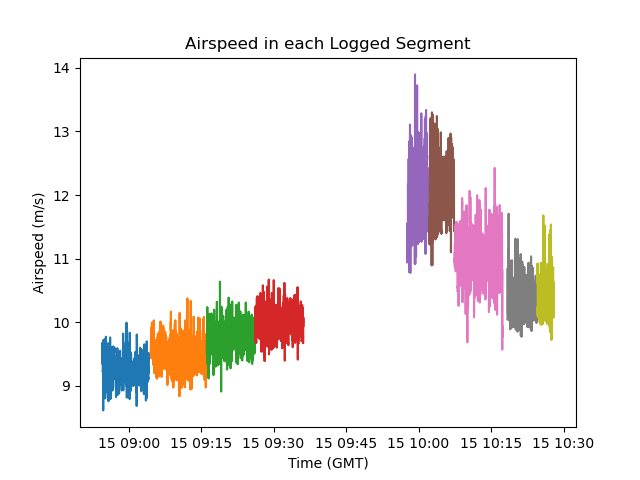

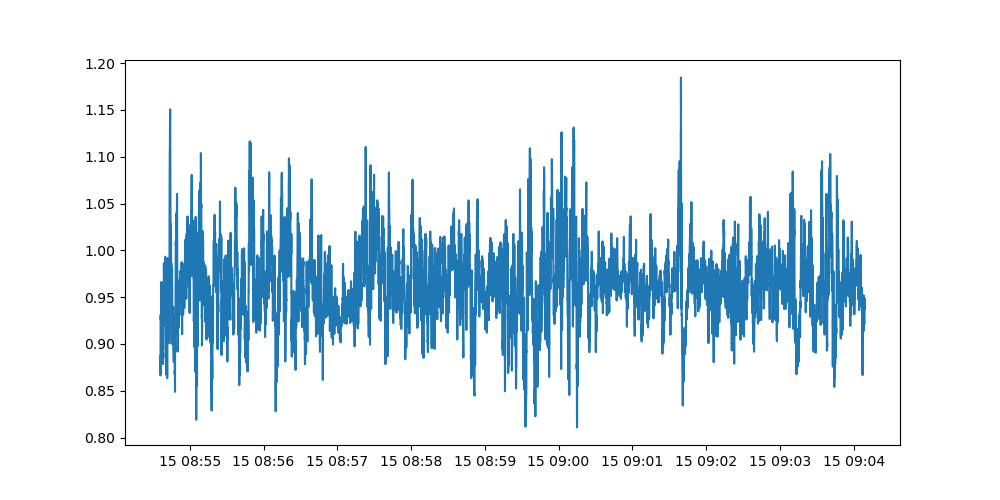

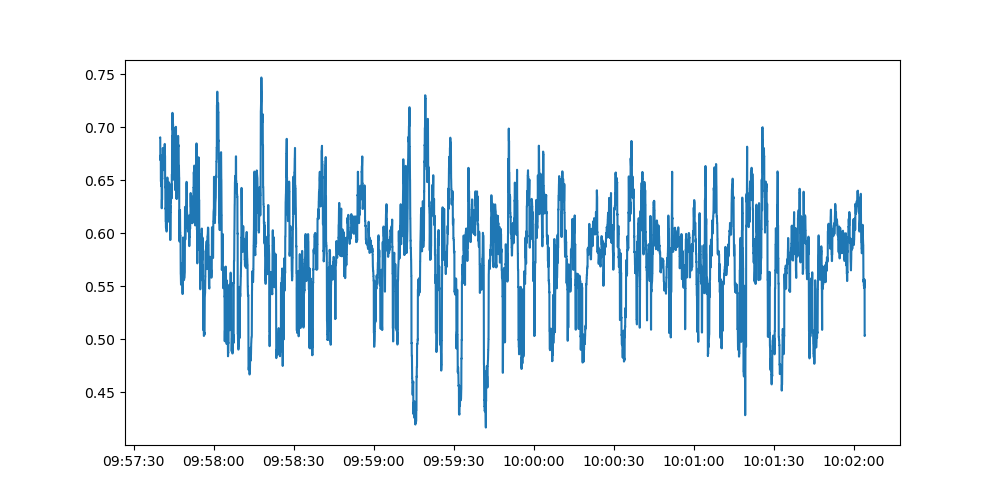

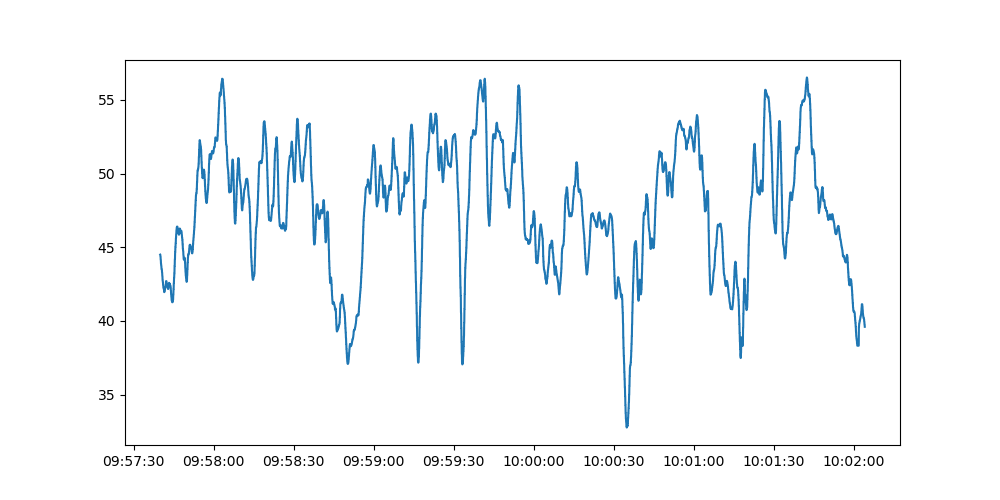

In [60]:
# Generating Start/End Times for Segments #
# Producing masks for dataframe

def get_mask(df, start, end, year, month, day):
    # Getting boolean mask from start and end times
    start_time = get_datetime(start, year, month, day)
    end_time = get_datetime(end, year, month, day)
    mask = (df.index > start_time) & (df.index < end_time)
    return mask

def get_datetime(hour_string, year, month, day):
    # Results completed datetime from hour string, and date
    split_nums = hour_string.split(':')
    hours = int(split_nums[0])
    minutes = int(split_nums[1])
    seconds = int(split_nums[2])
    return pd.Timestamp(year=year, month=month, day=day, hour=hours, minute=minutes, second=seconds)

year = 2022
month = 6
day = 15

seg_times = np.array([['08:54:36','09:04:09'],
                      ['09:04:36','09:16:09'],
                      ['09:16:11','09:26:10'],
                      ['09:26:10','09:36:09'],
                      ['09:57:40','10:02:04'],
                      ['10:02:14','10:07:21'],
                      ['10:07:29','10:17:21'],
                      ['10:18:25','10:24:34'],
                      ['10:24:37','10:27:55']])
print(seg_times[0,1])
masks = []
for i in range(np.shape(seg_times)[0]):
    mask = get_mask(df, seg_times[i,0], seg_times[i,1], year, month, day)
    masks.append(mask)

plt.figure()
plt.title("Airspeed in each Logged Segment")

for i in range(len(masks)):
    plt.plot(df[masks[i]]["Airspeed"])
plt.xlabel("Time (GMT)")
plt.ylabel("Airspeed (m/s)")
plt.show()

# Testing if it works on the analyzed data!

plt.figure(figsize=(10,5))
plt.plot(df.index[masks[0]], CL[masks[0]])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df.index[masks[4]], CL[masks[4]])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df.index[masks[4]], n[masks[4]])
plt.show()


## Results:

Looks like it works on the data, now need to show all the analyzed data from segmentation
Check:
1. Power required estimates are reasonable
2. Check J is reasonable
3. Check n is reasonable